In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import joblib
import zipfile

import warnings
warnings.filterwarnings('ignore')

#### 1. Preliminary Data Analysis and Cleaning

In [2]:
# 1. Download, unzip and load the data folder from https://archive.ics.uci.edu/static/public/186/wine+quality.zip. Select the winequality-white.csv file.
# Load it as white-wine.csv..


# loading dataset
path = r"C:\Users\user234\Downloads\wine+quality\winequality-white.csv"

def load_data(path):
    white_wine = pd.read_csv(path, sep=";")
    return white_wine

white_wine = load_data(path)



In [3]:
# 2. Display the first 6 rows and dataset shape.

def display_first_six_row(df):
    return df.head(6)

display_first_six_row(white_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [4]:
# 3. Check for missing values and handle them appropriately.

def check_missing_value(df):
    return df.isna().sum()

check_missing_value(white_wine)
    

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
# 4. Check for duplicates and remove them if necessary.
def check_duplicate(df):
    duplicated = df.duplicated().sum()
    print(f"there are {duplicated} duplicates")
    if duplicated > 0:
        df.drop_duplicates(inplace=True)
        print(df.shape)
        return df
    else:
        print("No duplcate found")


df = check_duplicate(white_wine)


there are 937 duplicates
(3961, 12)


In [6]:
# 5. Verify data types and correct them if needed.
def verify_dtype(df):
    return df.dtypes

verify_dtype(white_wine)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

**6. Provide a brief markdown summary of all data cleaning actions taken.**
- Missing value: there are no missing value found in the dataset
- dtype: they are all numerical value
- Duplicate values: there are `937` row in the dataset which was drop




Objectives To explore the dataset through univariate analysis on the features, and correlation of target and features only, and prepare it for modeling through scaling.
Instructions
1. Perform univariate analysis on all numerical features (use any of histograms, boxplots, or countplots).
2. Examine the correlation of each feature with the target variable (quality).
3. Map the quality column into categorical classes as follows:
9- Best
8 - Best
7-Good
6- Good
5 - Average
4- Bad
3 - Bad
4. Ensure this mapped categorical target is used for all subsequent modeling steps.
5. Split the dataset into features x and target y.
6. Apply appropriate scaling (StandardScaler or MinMaxScaler) to all numerical features.
7. Do not perform any feature engineering - all features should be used as they are.

#### 2. Exploratory Data Analysis (EDA) and Scaling

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
 Feature: fixed acidity
----------------------------------------


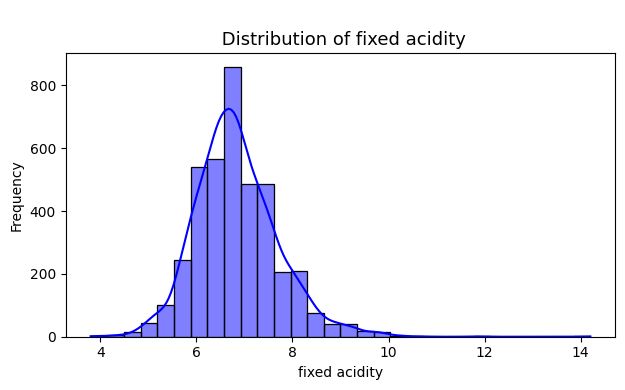

 Feature: volatile acidity
----------------------------------------


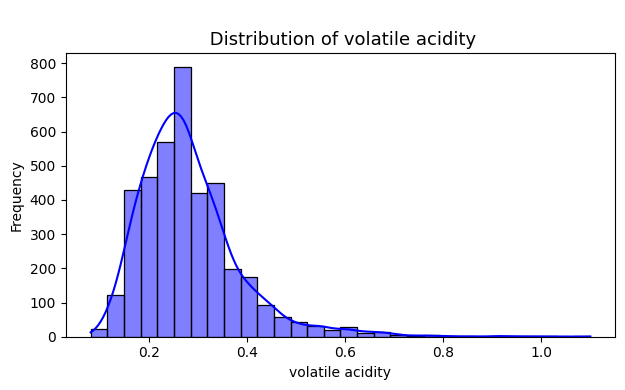

 Feature: citric acid
----------------------------------------


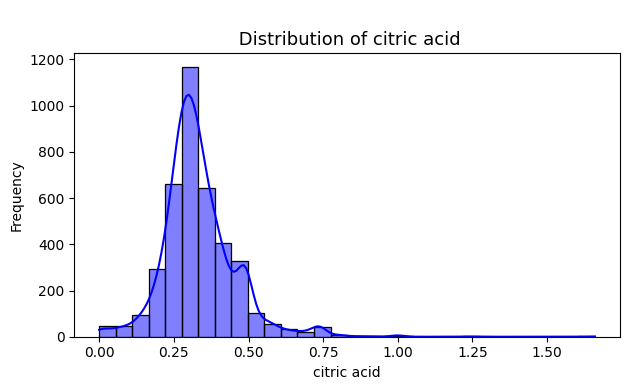

 Feature: residual sugar
----------------------------------------


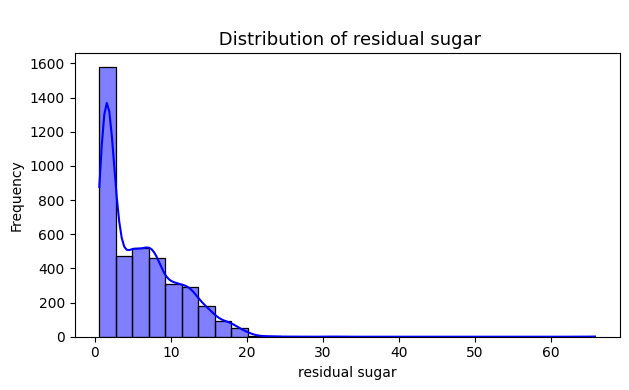

 Feature: chlorides
----------------------------------------


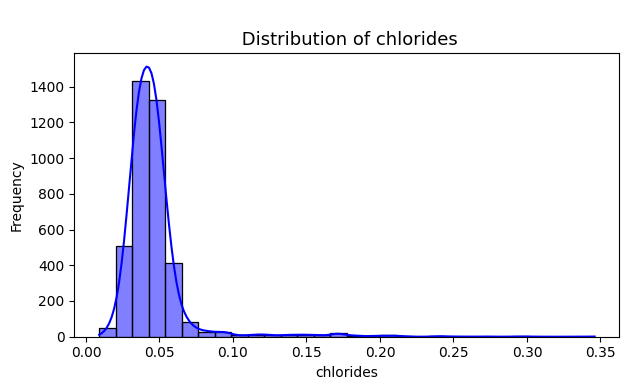

 Feature: free sulfur dioxide
----------------------------------------


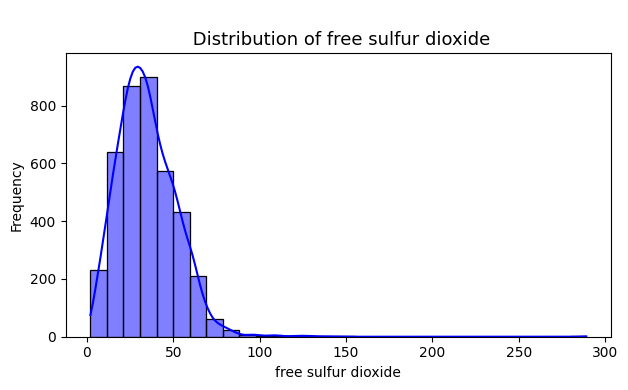

 Feature: total sulfur dioxide
----------------------------------------


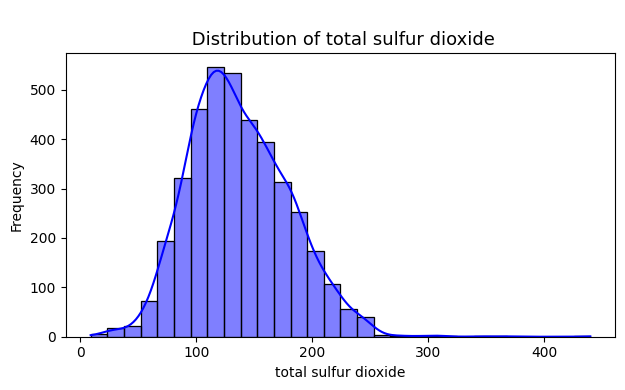

 Feature: density
----------------------------------------


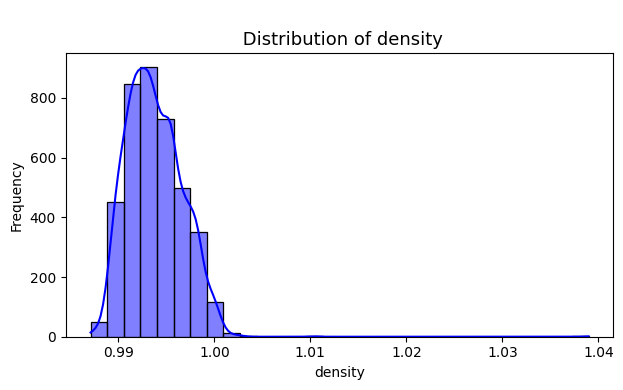

 Feature: pH
----------------------------------------


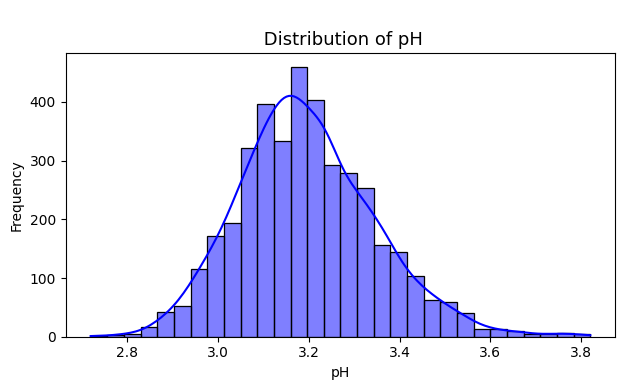

 Feature: sulphates
----------------------------------------


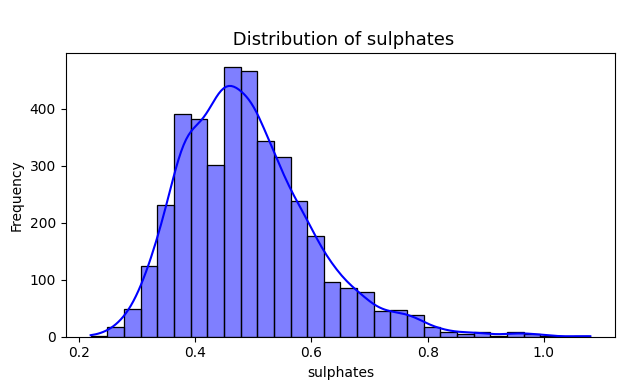

 Feature: alcohol
----------------------------------------


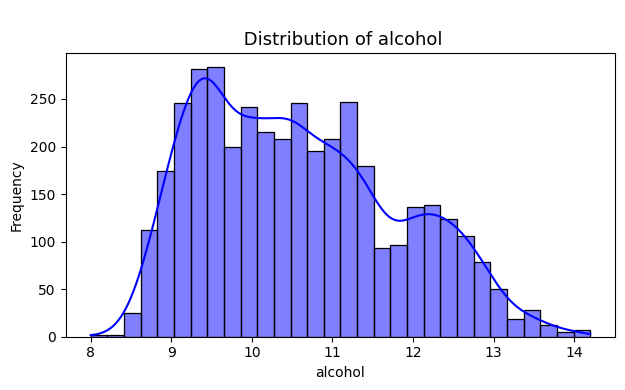

In [7]:
# 1. Perform univariate analysis on all numerical features (use any of histograms, boxplots, or countplots).

def univariate_numerical_data(df, column):

    print(f" Feature: {column}")
    print("-"*40)
    
    plt.figure(figsize=(12, 4))

    # Histogram + KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f'\n Distribution of {column}', fontsize=13)
    plt.xlabel(column)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


num_cols = num_cols = white_wine.select_dtypes(include=['float64']).columns

print(num_cols)

for num in num_cols:
    univariate_numerical_data(white_wine, num)

In [8]:

# 2. Examine the correlation of each feature with the target variable (quality).
def corr_with_target():
    print(white_wine.corrwith(df['quality']))

corr_with_target()


fixed acidity          -0.124636
volatile acidity       -0.190678
citric acid             0.007065
residual sugar         -0.117339
chlorides              -0.217739
free sulfur dioxide     0.010507
total sulfur dioxide   -0.183356
density                -0.337805
pH                      0.123829
sulphates               0.053200
alcohol                 0.462869
quality                 1.000000
dtype: float64


In [9]:
# 3. Map the quality column into categorical classes as follows:
# 9- Best
# 8 - Best
# 7-Good
# 6- Good
# 5 - Average
# 4- Bad
# 3 - Bad

df_copy = white_wine.copy()

def map_quality(df):
    df = df.replace({'quality':{9: 'best', 8:'best', 7:'Good', 6:'Good', 5:'Average', 4:'bad', 3:'bad'}})
    print(df['quality'].value_counts())
    return df

df_copy = map_quality(df_copy)


quality
Good       2477
Average    1175
bad         173
best        136
Name: count, dtype: int64


In [10]:
#5. Split the dataset into features x and target y.

def split_into_feature(df, target):
    x = df.drop(columns=target)
    y = df['quality']

    return x, y

x, y = split_into_feature(df_copy, 'quality')

In [11]:
# 6. Apply appropriate scaling (StandardScaler or MinMaxScaler) to all numerical features.
def scale_feature(x):
    scaler = MinMaxScaler(feature_range=(0,1))
    x_scaled = scaler.fit_transform(x)
    return scaler, x_scaled

scaler, x_scaled = scale_feature(x)

#### 3. Build a Base Classification Model

In [12]:
# 1. Split the data into training and testing sets (e.g., 80/20).

def split_data_train_test(x_scaled, y):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=72)
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = split_data_train_test(x_scaled, y)


Training LogisticRegression...
LogisticRegression Evaluation Metrics
Accuracy score: 0.6747
Classification Report:
              precision    recall  f1-score   support

     Average       0.64      0.39      0.49       256
        Good       0.68      0.92      0.78       471
         bad       0.00      0.00      0.00        34
        best       0.00      0.00      0.00        32

    accuracy                           0.67       793
   macro avg       0.33      0.33      0.32       793
weighted avg       0.61      0.67      0.62       793



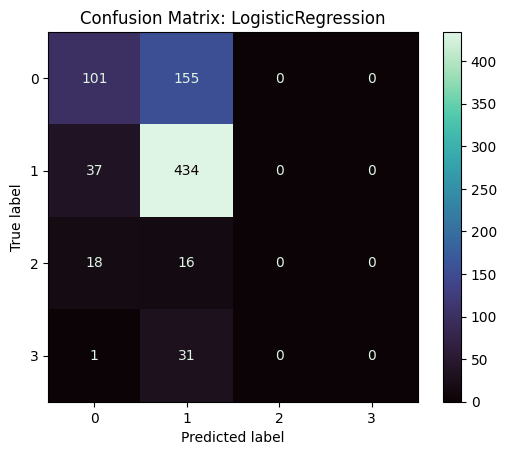


Training Decision Tree...
Decision Tree Evaluation Metrics
Accuracy score: 0.5813
Classification Report:
              precision    recall  f1-score   support

     Average       0.51      0.41      0.45       256
        Good       0.68      0.73      0.71       471
         bad       0.16      0.21      0.18        34
        best       0.08      0.09      0.09        32

    accuracy                           0.58       793
   macro avg       0.36      0.36      0.36       793
weighted avg       0.58      0.58      0.58       793



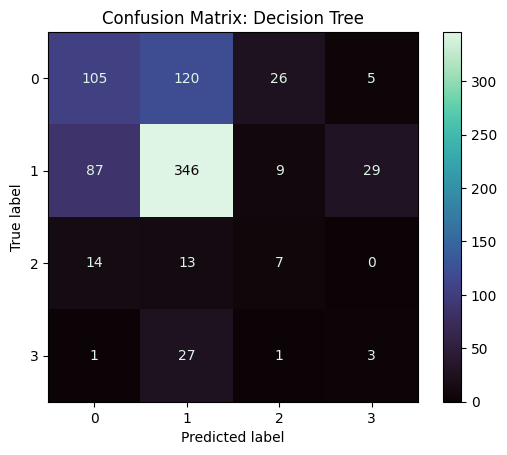

In [13]:
# 2. Train a simple model such as Logistic Regression or Decision Tree Classifier.
models = {
    'LogisticRegression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
}

def train_evaluate_models(models, X_train, X_test, y_train, y_test):
    """
    Trains and evaluates multiple classification models.
    """
    results = {}  # store accuracy for each model
    for model_name, model in models.items():
        print(f"\nTraining {model_name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Evaluation metrics
        acc = accuracy_score(y_test, y_pred)
        print(f"{model_name} Evaluation Metrics")
        print(f"Accuracy score: {acc:.4f}")
        print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
        
        # Store accuracy
        results[model_name] = acc
        
        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='mako')
        plt.title(f"Confusion Matrix: {model_name}")
        plt.show()

results = train_evaluate_models(models, x_train, x_test, y_train, y_test)


#### 4. Build and Compare Multiple Models


Training LogisticRegression...
LogisticRegression Evaluation Metrics
Accuracy score: 0.6747
Classification Report:
              precision    recall  f1-score   support

     Average       0.64      0.39      0.49       256
        Good       0.68      0.92      0.78       471
         bad       0.00      0.00      0.00        34
        best       0.00      0.00      0.00        32

    accuracy                           0.67       793
   macro avg       0.33      0.33      0.32       793
weighted avg       0.61      0.67      0.62       793



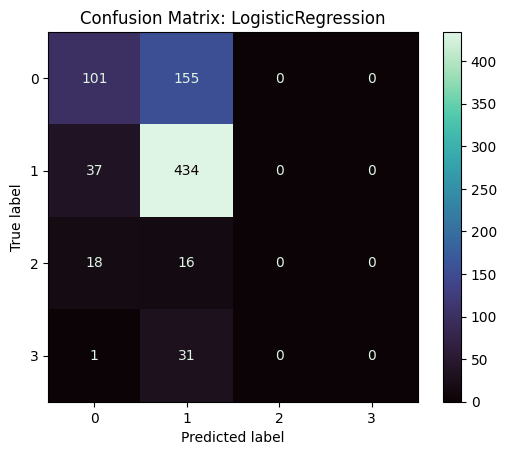


Training Random Forest...
Random Forest Evaluation Metrics
Accuracy score: 0.6974
Classification Report:
              precision    recall  f1-score   support

     Average       0.66      0.48      0.56       256
        Good       0.71      0.90      0.80       471
         bad       0.36      0.12      0.18        34
        best       0.00      0.00      0.00        32

    accuracy                           0.70       793
   macro avg       0.43      0.38      0.38       793
weighted avg       0.65      0.70      0.66       793



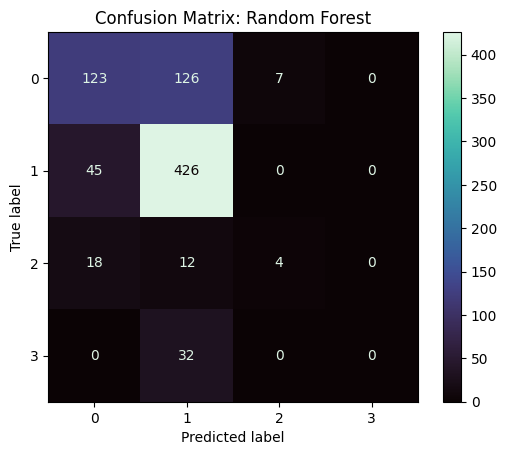


Training Decision Tree...
Decision Tree Evaluation Metrics
Accuracy score: 0.5914
Classification Report:
              precision    recall  f1-score   support

     Average       0.52      0.42      0.47       256
        Good       0.69      0.73      0.71       471
         bad       0.21      0.29      0.24        34
        best       0.13      0.16      0.14        32

    accuracy                           0.59       793
   macro avg       0.39      0.40      0.39       793
weighted avg       0.59      0.59      0.59       793



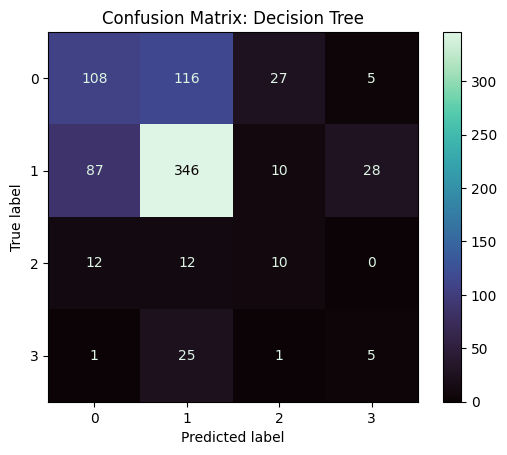


Training k-Nearest Neigbour...
k-Nearest Neigbour Evaluation Metrics
Accuracy score: 0.6784
Classification Report:
              precision    recall  f1-score   support

     Average       0.60      0.53      0.57       256
        Good       0.72      0.85      0.78       471
         bad       0.33      0.03      0.05        34
        best       0.17      0.03      0.05        32

    accuracy                           0.68       793
   macro avg       0.46      0.36      0.36       793
weighted avg       0.64      0.68      0.65       793



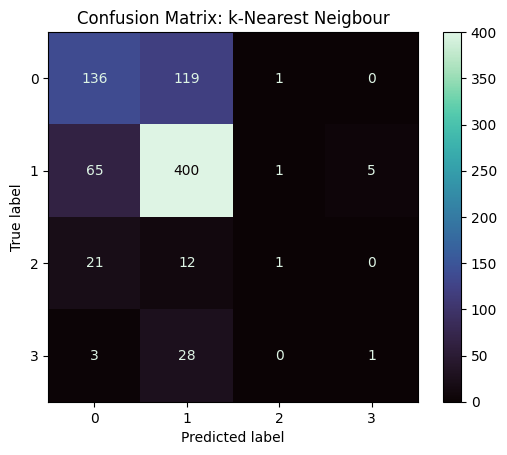


Training svm...
svm Evaluation Metrics
Accuracy score: 0.6898
Classification Report:
              precision    recall  f1-score   support

     Average       0.67      0.44      0.53       256
        Good       0.70      0.92      0.79       471
         bad       0.00      0.00      0.00        34
        best       0.00      0.00      0.00        32

    accuracy                           0.69       793
   macro avg       0.34      0.34      0.33       793
weighted avg       0.63      0.69      0.64       793



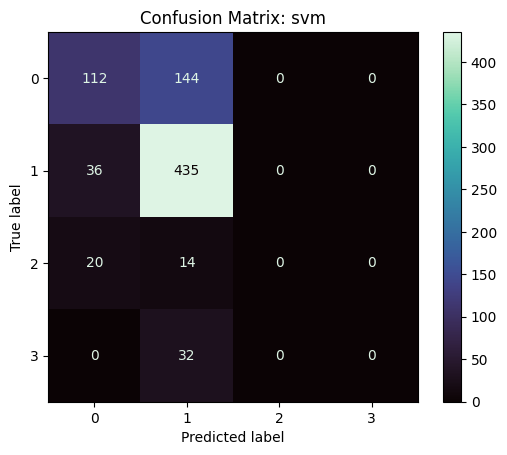


Training Naive Bayes...
Naive Bayes Evaluation Metrics
Accuracy score: 0.6230
Classification Report:
              precision    recall  f1-score   support

     Average       0.56      0.48      0.52       256
        Good       0.69      0.76      0.72       471
         bad       0.29      0.21      0.24        34
        best       0.16      0.16      0.16        32

    accuracy                           0.62       793
   macro avg       0.43      0.40      0.41       793
weighted avg       0.61      0.62      0.62       793



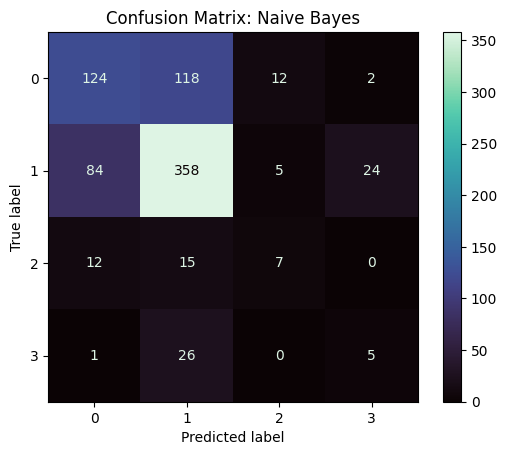

In [14]:
# 1. Train at least three different classification models (e.g., Random Forest, K-Nearest Neighbors, Gradient Boosting, Support Vector Machine).

models = {
    'LogisticRegression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    "k-Nearest Neigbour": KNeighborsClassifier(),
    "svm": SVC(),
    "Naive Bayes": GaussianNB()
}

def train_evaluate_models(models, X_train, X_test, y_train, y_test):
    """
    Trains and evaluates multiple classification models.
    """
    results = {}  # store accuracy for each model
    for model_name, model in models.items():
        print(f"\nTraining {model_name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Evaluation metrics
        acc = accuracy_score(y_test, y_pred)
        print(f"{model_name} Evaluation Metrics")
        print(f"Accuracy score: {acc:.4f}")
        print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
        
        # Store accuracy
        results[model_name] = acc
        
        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='mako')
        plt.title(f"Confusion Matrix: {model_name}")
        plt.show()

results = train_evaluate_models(models, x_train, x_test, y_train, y_test)

#### 5. Optimize Model Using Randomized Search

In [ ]:
# 1. Use RandomizedSearchCV to perform hyperparameter optimization on the best model.
def get_rf_params(**kwargs):
    rf = RandomForestClassifier(**kwargs)
    return rf.get_params()

get_rf_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [18]:
# 2. Retrain the model using the optimal parameters found.
def tune_random_forest_randomized(X_train, y_train, param_grid=None, n_iter=30, cv=5, random_state=234, verbose=1):
    if param_grid is None:
        param_grid = {
            "n_estimators": [50, 100, 200],
            "max_depth": [10, 20, 30],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
    
    rf = RandomForestClassifier(random_state=random_state)
    
    random_search = RandomizedSearchCV(
        estimator=rf,
        param_distributions=param_grid,
        n_iter=n_iter,
        cv=cv,
        n_jobs=-1,
        verbose=verbose,
        random_state=random_state
    )
    
    random_search.fit(X_train, y_train)
    
    best_model = random_search.best_estimator_
    best_params = random_search.best_params_
    
    print(f"Best parameters for Random Forest (RandomizedSearchCV): {best_params}")
    
    return best_model, best_params

best_rf_model, best_rf_params = tune_random_forest_randomized(x_train, y_train)



Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters for Random Forest (RandomizedSearchCV): {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10}


In [ ]:
# 3. Re-evaluate the model using the same classification metrics.

# Cross validation score for the best model- Random Fores

def evaluate_best_model(best_model, X_scaled, y, cv=5):
    # Compute cross-validation scores
    cv_scores = cross_val_score(best_model, X_scaled, y, cv=cv)
    
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean cross-validation score: {cv_scores.mean()}")
    
    return cv_scores, cv_scores.mean()


def evaluate_classification_model(best_rf_model, X_test, y_test):
    # Make predictions
    y_pred = best_rf_model.predict(X_test)
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=1))
    
    return y_pred

y_pred = evaluate_classification_model(best_rf_model, x_test, y_test)

cv_scores, mean_score = evaluate_best_model(best_rf_model, x_scaled, y)




Classification Report:
              precision    recall  f1-score   support

     Average       0.66      0.50      0.57       256
        Good       0.72      0.90      0.80       471
         bad       0.33      0.09      0.14        34
        best       1.00      0.00      0.00        32

    accuracy                           0.70       793
   macro avg       0.68      0.37      0.38       793
weighted avg       0.69      0.70      0.66       793

Cross-validation scores: [0.65825977 0.69191919 0.70833333 0.69444444 0.71969697]
Mean cross-validation score: 0.6945307424815622


#### 6. Save Model and Scaler

In [ ]:
# 1. Save the optimized model as model.pkl.
joblib.dump(best_rf_model, 'model.pkl')

['model.pkl']

In [ ]:
# 2. Save the scaler as scaler.pkl using joblib.

joblib.dump(scaler, 'scaler.pkl')
print("Model and scaler saved successfully.")

Model and scaler saved successfully.
